# T2

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sb

In [15]:
data = pd.read_csv("T2_features_final.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)

In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.5833333333333334


In [7]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.75


In [9]:
gb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)

Accuracy: 0.5


In [18]:
# Create a logistic regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier = LogisticRegression(max_iter=1000)
# Train the classifier
logreg_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.4166666666666667


In [8]:
from keras.models import Sequential, load_model
from keras.layers import Dense


In [9]:
norm = Normalizer(norm='max')
norm.fit(X_train)
X_train = norm.transform(X_train)

In [19]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD

learning_rate = 0.001

optimizer = SGD(learning_rate = learning_rate)
model1 = Sequential()
model1.add(Dense(512, activation='relu', input_dim=8))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model_T2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train, y_train, epochs=1000, batch_size=62, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model_T2.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.1482 - accuracy: 0.4375
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to best_model_T2.h5
1/1 [==============================] - 3s 3s/step - loss: 1.1482 - accuracy: 0.4375 - val_loss: 0.7879 - val_accuracy: 0.6667
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.8260 - accuracy: 0.5417
Epoch 2: val_accuracy did not improve from 0.66667
1/1 [==============================] - 0s 104ms/step - loss: 0.8260 - accuracy: 0.5417 - val_loss: 0.8991 - val_accuracy: 0.6667
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.4375
Epoch 3: val_accuracy improved from 0.66667 to 0.75000, saving model to best_model_T2.h5
1/1 [==============================] - 0s 191ms/step - loss: 0.7164 - accuracy: 0.4375 - val_loss: 0.7603 - val_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.6458
Epoch 4: val_a

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already obtained the predictions for your test dataset using your model1
# Replace `y_test` with the true labels and `y_pred_probs` and `y_pred_classes` with your model's 

# Assuming you have obtained the predicted probabilities and class labels as follows
y_pred_probs = model1.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred_probs > threshold).astype(int)


# Reduce the 2D prediction arrays to 1D arrays
#y_pred_probs = y_pred_probs[:, 0]
#y_pred_classes = y_pred_classes[:, 0]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.75
Precision: 0.7777777777777778
Recall: 0.875
F1 score: 0.823529411764706


In [21]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

# Make predictions on the test set
predicted_labels_rf = rf_classifier.predict(X_test)
predicted_labels_svm = svm_classifier.predict(X_test)
predicted_labels_lr = logreg_classifier.predict(X_test)
# Calculate precision for each model
precision_rf = precision_score(y_test, predicted_labels_rf)
precision_svm = precision_score(y_test, predicted_labels_svm)
precision_lr = precision_score(y_test, predicted_labels_lr)
# Calculate recall for each model
recall_rf = recall_score(y_test, predicted_labels_rf)
recall_svm = recall_score(y_test, predicted_labels_svm)
recall_lr = recall_score(y_test, predicted_labels_lr)
F1_rf = f1_score(y_test, predicted_labels_rf)
F1_svm = f1_score(y_test, predicted_labels_svm)
F1_lr = f1_score(y_test, predicted_labels_lr)
models = ['Random Forest', 'SVM', 'Logistic Regression']
precision_scores = [precision_rf,  precision_svm, precision_lr]
recall_scores = [recall_rf, recall_svm, recall_lr]
accuracy_score = [rf_accuracy, svm_accuracy, lr_accuracy]
f1_scores = [F1_rf, F1_svm, F1_lr]
# Print the performance scores
for i in range(len(models)):
    print(f"Performance scores for {models[i]}:")
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("F1-score:", f1_scores[i])
    print("Accuracy", accuracy_score[i])
    print()



Performance scores for Random Forest:
Precision: 0.6666666666666666
Recall: 0.75
F1-score: 0.7058823529411765
Accuracy 0.5833333333333334

Performance scores for SVM:
Precision: 0.6
Recall: 0.75
F1-score: 0.6666666666666665
Accuracy 0.75

Performance scores for Logistic Regression:
Precision: 0.5555555555555556
Recall: 0.625
F1-score: 0.5882352941176471
Accuracy 0.4166666666666667



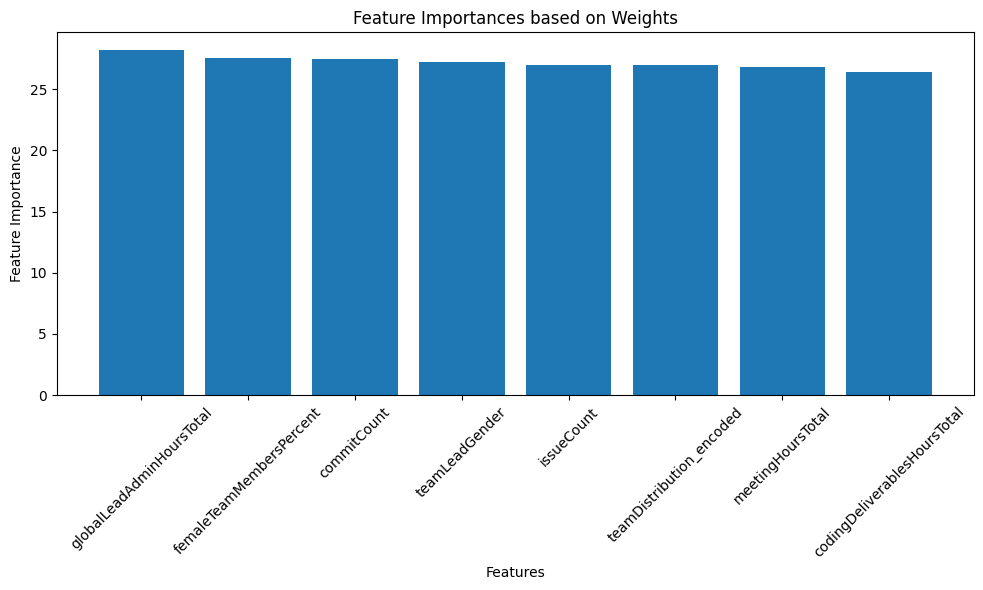

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights of the first layer
weights = model1.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Create a list of feature names
feature_names = ["femaleTeamMembersPercent", "meetingHoursTotal", "codingDeliverablesHoursTotal", "globalLeadAdminHoursTotal", "commitCount", "issueCount", "teamLeadGender","teamDistribution_encoded"]

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances based on Weights')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
from keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, tanh, linear, elu, selu, softplus, softsign, hard_sigmoid, exponential

# Define a function to create your model (to be used by GridSearchCV)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_layers=1, neurons=256, kernel_regularizer=None):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=8, kernel_regularizer=kernel_regularizer))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'adadelta':
        opt = Adadelta(learning_rate=learning_rate)
    elif optimizer == 'adamax':
        opt = Adamax(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer.")

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameters to search
optimizer_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad', 'adadelta', 'adamax', 'nadam'],
    'batch_size': [32, 64],
    'epochs': [100, 200, 300],
}

regularization_grid = {
    'kernel_regularizer': [None, l1(0.01), l2(0.01)]
}

other_hyperparameters_grid = {
    'activation': ['relu', 'sigmoid', 'softmax', 'tanh', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'exponential'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'hidden_layers': [1, 2, 3],
    'neurons': [256, 512, 1024]
}

# Create the KerasClassifier wrapper for optimizer grid search
optimizer_model = KerasClassifier(build_fn=create_model, verbose=0)
optimizer_halving_grid = HalvingGridSearchCV(estimator=optimizer_model, param_grid=optimizer_grid, cv=3)
optimizer_halving_result = optimizer_halving_grid.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy for optimizers
print("Best Parameters (Optimizers): ", optimizer_halving_result.best_params_)
print("Best Accuracy (Optimizers): ", optimizer_halving_result.best_score_)


c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at w

ValueError: 
All the 126 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surface\AppData\Local\Temp\ipykernel_13828\1968642639.py", line 22, in create_model
    opt = Adam(learning_rate=learning_rate)
                             ^^^^^^^^^^^^^
NameError: name 'learning_rate' is not defined


In [ ]:
# Update the model with the best optimizer found
model.set_params(**optimizer_halving_result.best_params_)

# Perform halving grid search for regularization
regularization_halving_grid = HalvingGridSearchCV(estimator=model, param_grid=regularization_grid, cv=3)
regularization_halving_result = regularization_halving_grid.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy for regularization
print("Best Parameters (Regularization): ", regularization_halving_result.best_params_)
print("Best Accuracy (Regularization): ", regularization_halving_result.best_score_)

# Update the model with the best regularization found
model.set_params(**regularization_halving_result.best_params_)

# Perform halving grid search for other hyperparameters
other_hyperparameters_halving_grid = HalvingGridSearchCV(estimator=model, param_grid=other_hyperparameters_grid, cv=3)
other_hyperparameters_halving_result = other_hyperparameters_halving_grid.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy for other hyperparameters
print("Best Parameters (Other Hyperparameters): ", other_hyperparameters_halving_result.best_params_)
print("Best Accuracy (Other Hyperparameters): ", other_hyperparameters_halving_result.best_score_)

# Final best parameters and corresponding accuracy
best_params = {**optimizer_halving_result.best_params_, **regularization_halving_result.best_params_, **other_hyperparameters_halving_result.best_params_}
best_accuracy = other_hyperparameters_halving_result.best_score_

# Print the final best parameters and the corresponding accuracy
print("Final Best Parameters: ", best_params)
print("Final Best Accuracy: ", best_accuracy)


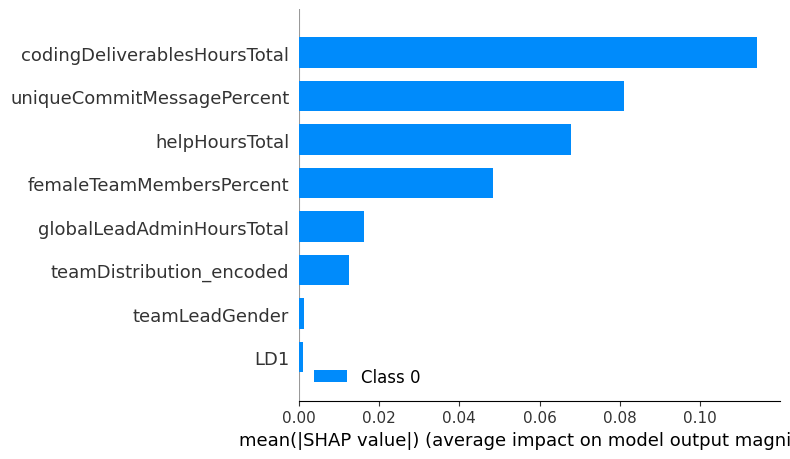

In [23]:
import numpy as np
import shap
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

feature_names = ["femaleTeamMembersPercent", "helpHoursTotal", "codingDeliverablesHoursTotal", "globalLeadAdminHoursTotal", "uniqueCommitMessagePercent", "teamLeadGender","teamDistribution_encoded","LD1","productLetterGrade_encoded"]

explainer = shap.DeepExplainer(model1, X_train)
shap_values = explainer.shap_values(X_test)



shap.summary_plot(shap_values, X_test, feature_names=feature_names)
